In [11]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
import numpy as np

In [4]:
t7_exp = pd.read_csv('quantifications.csv', index_col=0)
no_t7_exp = pd.read_csv('quantifications_no_t7_expansion.csv', index_col=0)

In [5]:
t7_exp.head()

,Accession,IDBD #,Detected Organism,log(Genomic Equivalents)/ml,log(cfu/ml),Plate count log(cfu)/ml
0,IDBD-D100387,IDbyDNA-5381,Escherichia coli,7.875025,5.0,6.041393
1,IDBD-D100388,IDbyDNA-5382,Escherichia coli,7.728532,5.0,5.698970
2,IDBD-D100389,IDbyDNA-5383,Escherichia coli,7.631641,5.0,6.146128
3,IDBD-D100390,IDbyDNA-5384,Escherichia coli,7.831336,5.0,6.342423
4,IDBD-D100391,IDbyDNA-5385,Escherichia coli,7.893857,5.0,5.602060


In [6]:
no_t7_exp.head()

,Accession,IDBD #,Detected Organism,log(Genomic Equivalents)/ml,log(cfu/ml),Plate count log(cfu)/ml
0,IDBD-D100387,IDbyDNA-5381,Escherichia coli,9.025555,5.0,6.041393
1,IDBD-D100388,IDbyDNA-5382,Escherichia coli,8.230548,5.0,5.698970
2,IDBD-D100389,IDbyDNA-5383,Escherichia coli,9.333082,5.0,6.146128
3,IDBD-D100390,IDbyDNA-5384,Escherichia coli,9.054023,5.0,6.342423
4,IDBD-D100391,IDbyDNA-5385,Escherichia coli,8.135538,5.0,5.602060


In [8]:
all(t7_exp['Accession'] == no_t7_exp['Accession'])

True

In [9]:
t7_exp = t7_exp.rename(columns={'log(Genomic Equivalents)/ml': 'log(GE)/ml, Expanded Reporting ID'})
no_t7_exp = no_t7_exp.rename(columns={'log(Genomic Equivalents)/ml': 'log(GE)/ml, T7 Only Reporting ID'})
merged = t7_exp.merge(no_t7_exp[['Accession', 'log(GE)/ml, T7 Only Reporting ID']], on='Accession')

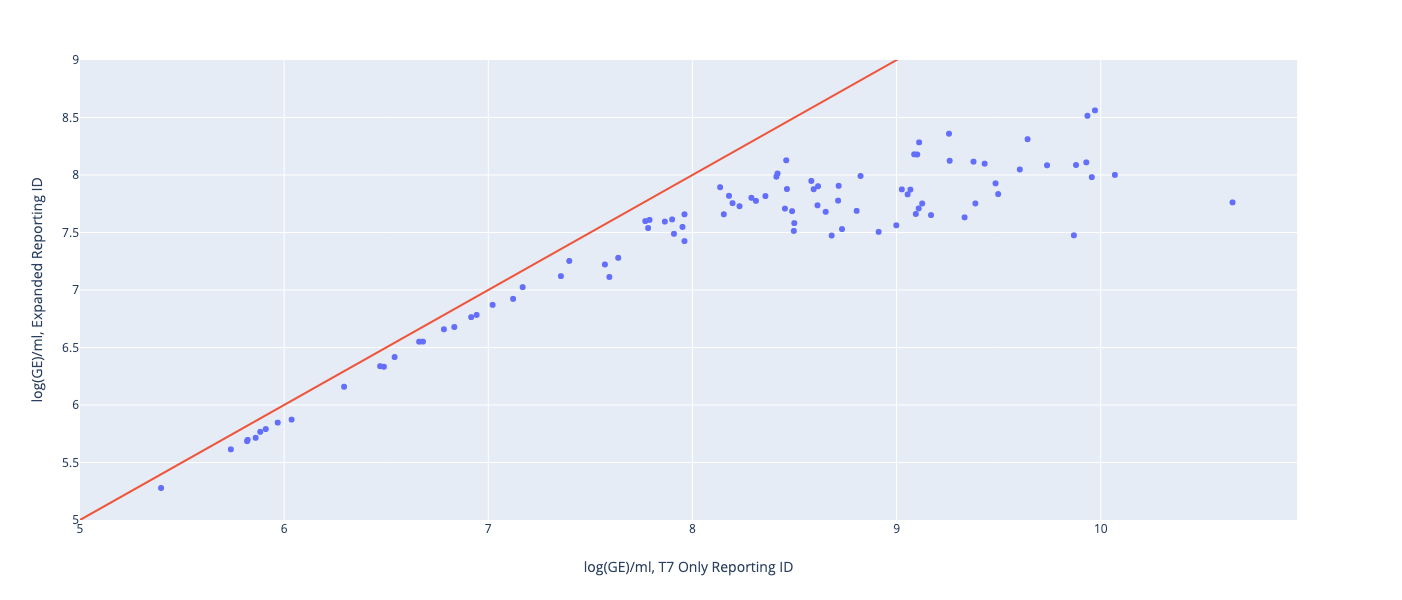

In [13]:
fig = px.scatter(merged, x='log(GE)/ml, T7 Only Reporting ID', y='log(GE)/ml, Expanded Reporting ID')
fig.add_trace(go.Scatter(x=np.arange(5, 11), y=np.arange(5, 11), mode='lines', showlegend=False))
fig.update_yaxes(range=[5, 9])
fig.show()

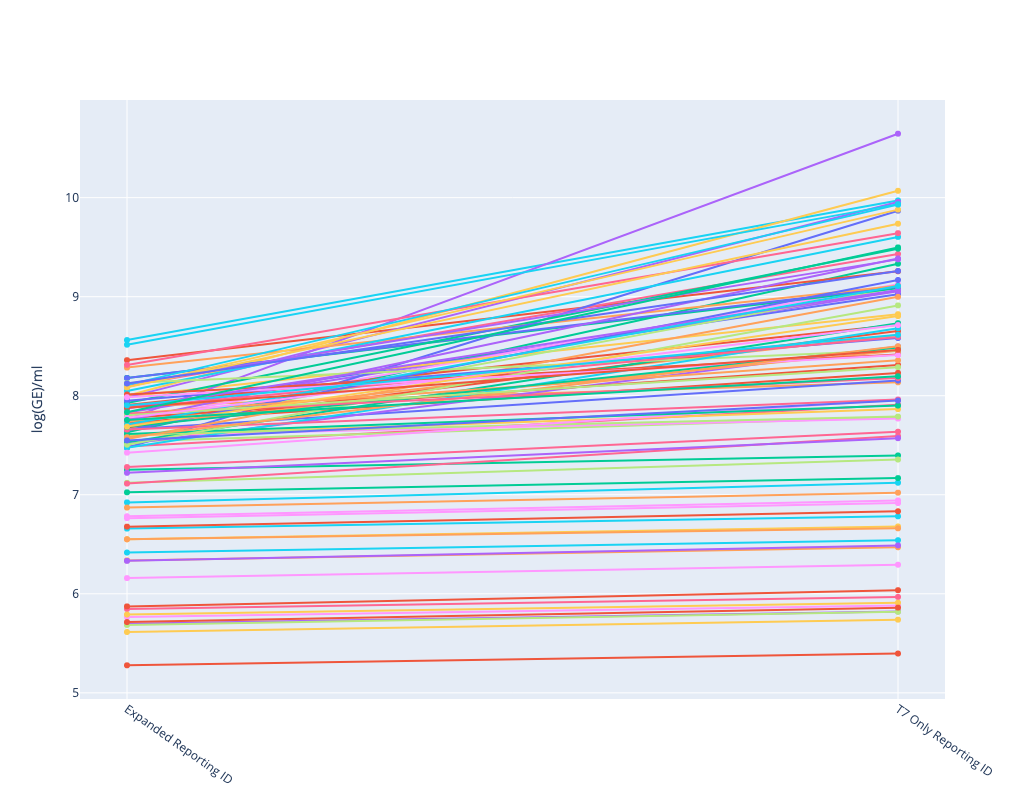

In [25]:
fig = go.Figure()
for idx, row in merged.iterrows():
    fig.add_trace(go.Scatter(y=[row['log(GE)/ml, Expanded Reporting ID'], row['log(GE)/ml, T7 Only Reporting ID']],
                             x=['Expanded Reporting ID', 'T7 Only Reporting ID'], showlegend=False))
fig.update_layout(height=800, width=600)
fig.update_yaxes(title='log(GE)/ml')
fig.update_xaxes(nticks=2, tickangle=35)
fig.show()